In [22]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from pandas_datareader import data
import pandas as pd
from datetime import datetime, timedelta
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [13]:
#Find today's date
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2018-10-25


In [14]:
#Find three years from today
three_year = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
print(three_year)

2015-10-26


In [38]:
#Daily Data
tickers = ['AAPL']

dict = {}
# User pandas_reader.data.DataReader to load the desired data. As simple as that.

for ticker in tickers:
    panel_data = data.DataReader(ticker, 'iex', three_year, today)
    panel_data["Ticker"] = ticker
    panel_data["Moving Average"] = panel_data["close"].rolling(window=5).mean()
    panel_data["Date"]=panel_data.index

In [16]:
panel_data.head()

,open,high,low,close,volume,Ticker,Moving Average,Date
date,,,,,,,,
2015-10-26,111.9120,111.9594,108.9171,109.2583,66333781,AAPL,NaN,2015-10-26
2015-10-27,109.3720,110.4524,108.0356,108.5664,69884400,AAPL,NaN,2015-10-27
2015-10-28,110.8221,113.0683,109.9975,113.0398,85551352,AAPL,NaN,2015-10-28
2015-10-29,112.4996,114.3857,112.0921,114.2340,51227334,AAPL,NaN,2015-10-29
2015-10-30,114.6700,114.8880,113.2104,113.2578,49365254,AAPL,111.67126,2015-10-30


TypeError: an integer is required (got type str)

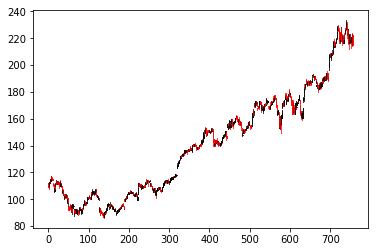

In [33]:
fig, ax = plt.subplots()
candlestick2_ohlc(ax,panel_data['open'],panel_data['high'],panel_data['low'],panel_data['close'],width=0.6)

xdate = [datetime.fromtimestamp(i) for i in panel_data["Date"]]

ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

def mydate(x,pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

fig.autofmt_xdate()
fig.tight_layout()
plt.grid()

plt.show()

In [39]:
trace = go.Candlestick(x=panel_data.index,
                      open=panel_data["open"],
                      high=panel_data["high"],
                      low=panel_data["low"],
                      close=panel_data["close"])
data = [trace]
py.iplot(data, filename='simple_candlestick')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.